In [1]:
# ex3: competition between flow-induced forces and thermal fluctuations

%matplotlib inline
import pystokes, numpy as np, matplotlib.pyplot as plt

In [2]:
# particle radius, self-propulsion speed, number and fluid viscosity
b, vs, Np, eta = 1.0, 0.4, 2, 0.1

rbm     = pystokes.wallBounded.Rbm(radius=b, particles=Np, viscosity=eta)
forces  = pystokes.forceFields.Forces(particles=Np)

In [3]:
def twoBodyDynamics(T=1):
    """simulation of two active colloid near a wall in a fluid at temperature T"""
    
    #initial position and orientation
    r, p = np.array([-2.5,2.5, 0,0 , 2.5, 2.5]), np.array([0,0, 0,0, -1.0,-1.0])
    
    # integration parameters and arrays
    Nt=2**16;  x1=np.zeros(Nt);  x2=np.zeros(Nt)
    x1[0], x2[0] = r[0], r[1];  dt=0.01;  sqdt=np.sqrt(T*dt)
    F = np.zeros(3*Np);  v = np.zeros(3*Np); vv = np.zeros(3*Np)
    F0 = 6*np.pi*eta*b*vs*(1+9*b/(8*r[4])); #active stall force

    # integration loop
    for i in range(Nt-1):
        forces.lennardJones(F,r,lje=.6,ljr=2.1); F[4],F[5]= F0, F0
        rbm.mobilityTT(v, r, F)  
                
        # Euler-Maryuama integration
        rbm.noiseTT(vv, r)
        x1[i+1] = x1[i] + dt*v[0] + sqdt*vv[0]
        x2[i+1] = x2[i] + dt*v[1] + sqdt*vv[1]

        #reset the variables for next time step
        r[0],r[1],v,vv,F[0:3] = x1[i+1], x2[i+1],v*0,vv*0,F[0:3]*0        
    return x1, x2

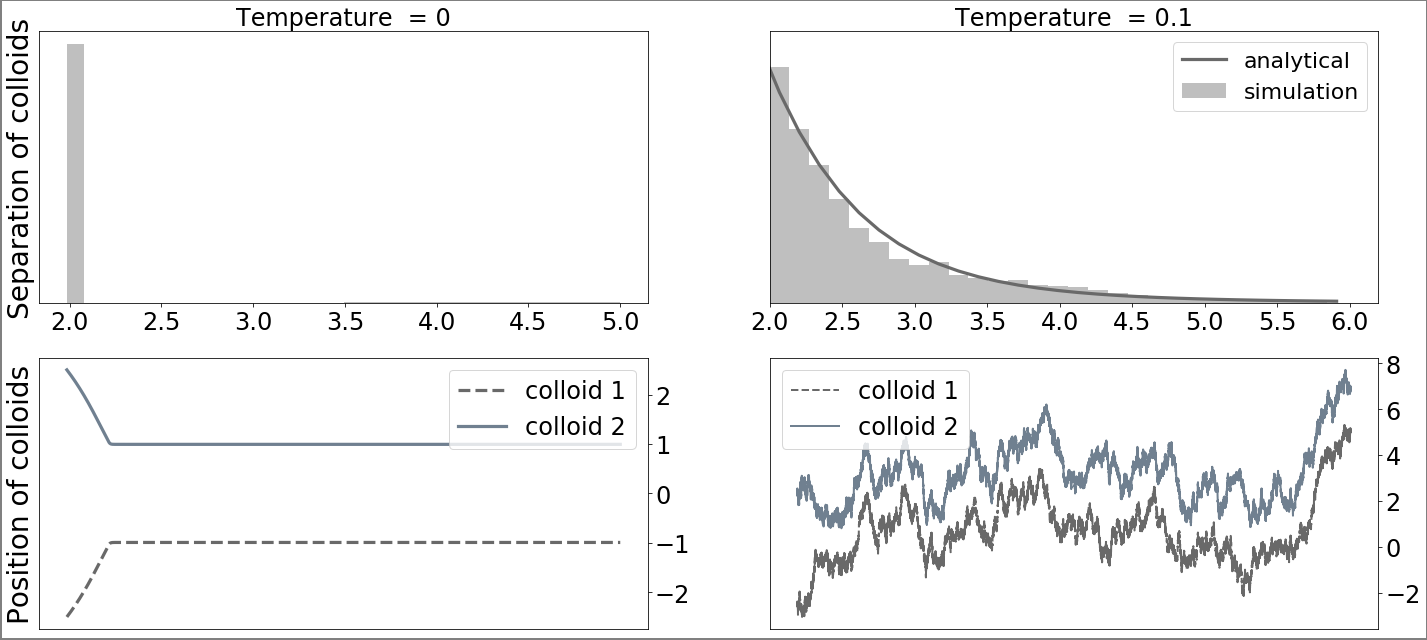

In [4]:
T=([0, .1]);   pystokes.utils.plotTrajectory(twoBodyDynamics, T, bins=32)